In [20]:
import numpy as np
import pandas as pd
import os

# 目录路径
target_dir = "../data/2020-station-month/"
result_dir = "../data/GWR_month/"
output_file = "../evaluate/2020-gwr.csv"

# 获取两个目录中共同的文件名列表
target_files = os.listdir(target_dir)
result_files = os.listdir(result_dir)
common_files = sorted(set(target_files) & set(result_files))

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=["文件名", "相关系数 (CC)", "偏差 (BIAS)", "均方根误差 (RMSE)"])

for file_name in common_files:
    target_path = os.path.abspath(os.path.join(target_dir, file_name))
    result_path = os.path.abspath(os.path.join(result_dir, file_name))

    target = np.load(target_path)
    result = np.load(result_path)

    # 找出目标和结果数组中没有 NaN 值的数据点的索引
    valid_indices = ~np.isnan(target) & ~np.isnan(result)

    # 使用布尔索引来选择没有 NaN 值的数据点
    target_valid = target[valid_indices]
    result_valid = result[valid_indices]

    # 计算相关系数 (CC)
    cc = np.corrcoef(target_valid, result_valid)[0, 1]

    # 计算偏差 (BIAS)
    bias = np.mean(result_valid - target_valid)

    # 计算均方根误差 (RMSE)
    rmse = np.sqrt(np.mean((result_valid - target_valid)**2))

    # 将结果添加到DataFrame中
    results_df = pd.concat([results_df, pd.DataFrame({"文件名": [file_name], "相关系数 (CC)": [cc], "偏差 (BIAS)": [bias], "均方根误差 (RMSE)": [rmse]})], ignore_index=True)

# 将DataFrame写入CSV文件
results_df.to_csv(output_file, index=False)

print("结果已保存到", output_file)


结果已保存到 ../evaluate/2020-gwr.csv


/var/folders/6g/9s2hyy596zx97pgq_zhr958c0000gn/T/ipykernel_8123/3246611734.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({"文件名": [file_name], "相关系数 (CC)": [cc], "偏差 (BIAS)": [bias], "均方根误差 (RMSE)": [rmse]})], ignore_index=True)


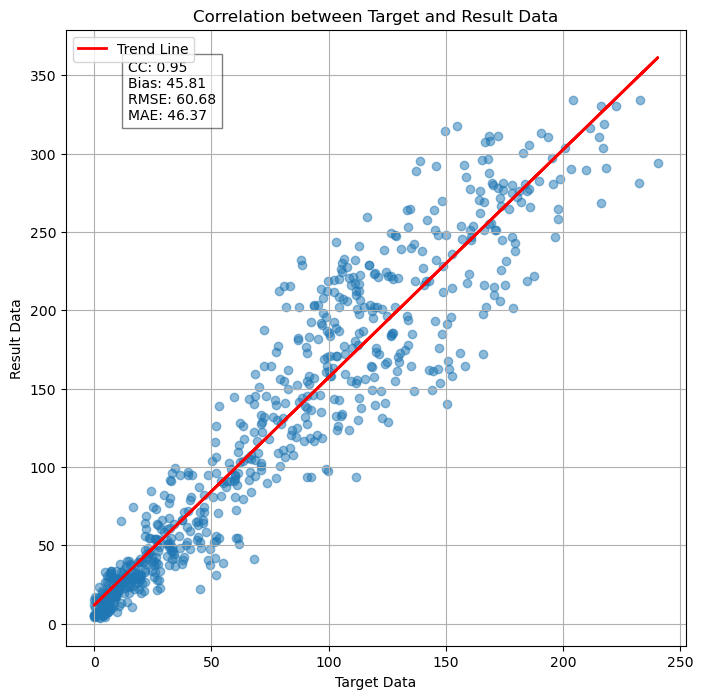

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 加载数据
target = np.load(os.path.abspath("../data/2020-station-month/202001.npy"))
result = np.load(os.path.abspath("../data/2020-changjiang-month-by-station/202001.npy"))

# 计算相关性系数
cc = np.corrcoef(target.flatten(), result.flatten())[0, 1]

# 计算偏差
bias = np.mean(result - target)

# 计算均方根误差
rmse = np.sqrt(mean_squared_error(target.flatten(), result.flatten()))

# 计算平均绝对误差
mae = mean_absolute_error(target.flatten(), result.flatten())

# 线性回归拟合
lr = LinearRegression()
lr.fit(target.flatten().reshape(-1, 1), result.flatten())
trend_line = lr.predict(target.flatten().reshape(-1, 1))

# 绘制散点图和趋势线
plt.figure(figsize=(8, 8))
plt.scatter(target.flatten(), result.flatten(), alpha=0.5)
plt.plot(target.flatten(), trend_line, color='red', linewidth=2, label='Trend Line')
plt.xlabel('Target Data')
plt.ylabel('Result Data')
plt.title('Correlation between Target and Result Data')

# 标注相关性系数、偏差、均方根误差和平均绝对误差
plt.text(0.1, 0.9, f'CC: {cc:.2f}\nBias: {bias:.2f}\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}',
         horizontalalignment='left',
         verticalalignment='center',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True)
plt.legend()
plt.show()
